# Fraud Data EDA

## Import Dependencies

In [1]:
import sys
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Add src to path
sys.path.append(os.path.abspath(os.path.join('..')))

## Load modules

In [2]:
from src.data_loader import DataLoader
from src.preprocessor import EcommercePreprocessor

file_path = "../data/raw"

## Load Data

In [3]:
loader = DataLoader(file_path)
fraud_df = loader.load_csv("Fraud_Data.csv")
ip_df = loader.load_csv("IpAddress_to_Country.csv")

Loading Fraud_Data.csv...


Loading IpAddress_to_Country.csv...


## Initialize Preprocessor

In [4]:
processor = EcommercePreprocessor(fraud_df, ip_df)

## Exploratory Data Analysis(EDA) - Before Processing

### Univariate

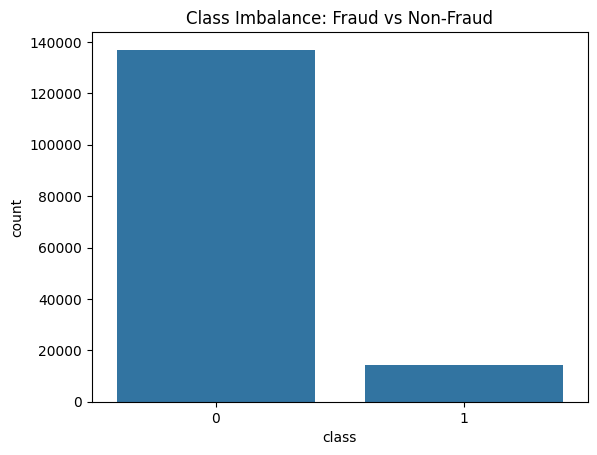

In [5]:
sns.countplot(x='class', data=processor.df)
plt.title('Class Imbalance: Fraud vs Non-Fraud')
plt.show()

### Bivariate

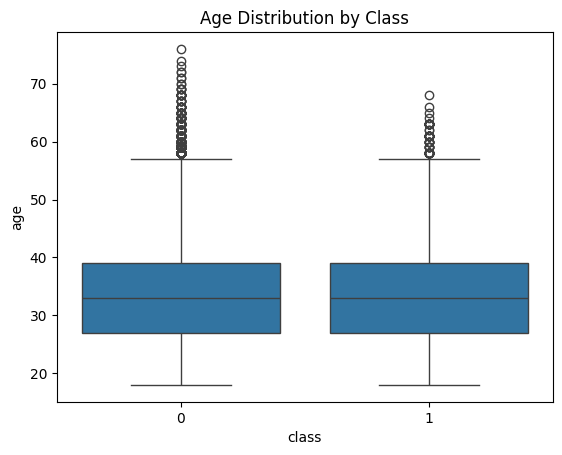

In [6]:
sns.boxplot(x='class', y='age', data=processor.df)
plt.title('Age Distribution by Class')
plt.show()

## Cleaning and Geo merge

In [7]:
processor.clean_duplicates()
processor.fix_datetimes()
processor.merge_geolocation()

Dropped 0 duplicate rows.
Converting timestamps...
Processing Geolocation (this may take a while)...
Geolocation finished. Found 182 unique countries.


## Analyze fraud by Country (After merge)

Top Fraudulent Countries:
 country
United States        5551
Unknown              1883
China                1043
Japan                 715
United Kingdom        477
Korea Republic of     380
Canada                348
France                300
Brazil                270
Germany               262
Name: count, dtype: int64


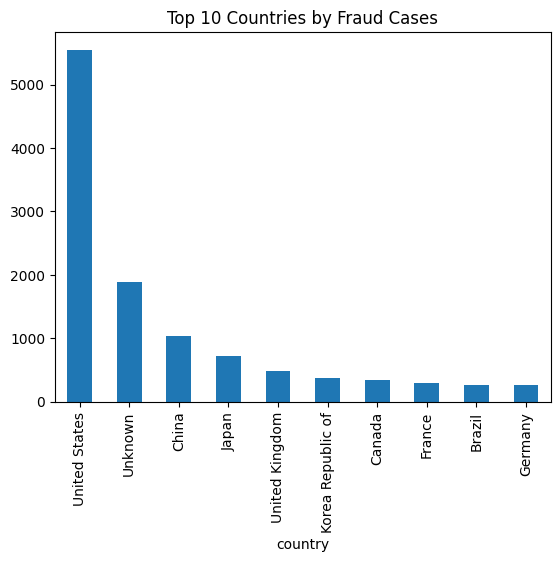

In [8]:
fraud_by_country = processor.df[processor.df['class']==1]['country'].value_counts().head(10)
print("Top Fraudulent Countries:\n", fraud_by_country)
fraud_by_country.plot(kind='bar', title='Top 10 Countries by Fraud Cases')
plt.show()

## Feature Engineering

In [9]:
processor.feature_engineering()

Engineering features...


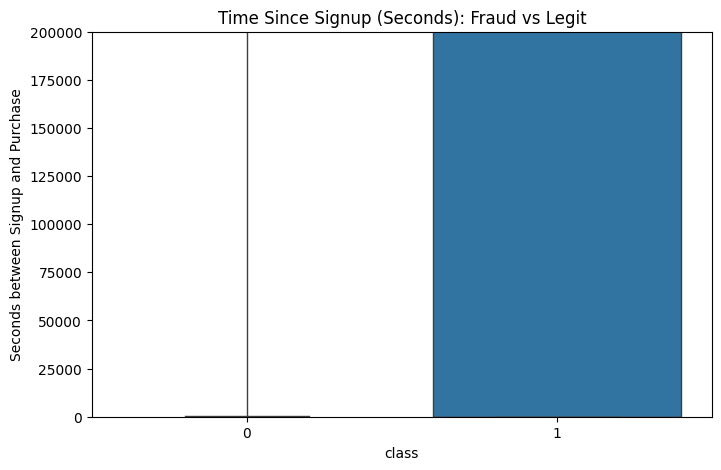

In [10]:
plt.figure(figsize=(8, 5))
# We limit y-axis because 'time_since_signup' can be huge for legit users
sns.boxplot(x='class', y='time_since_signup', data=processor.df)
plt.ylim(0, 200000) # Zoom in to see the difference
plt.title('Time Since Signup (Seconds): Fraud vs Legit')
plt.ylabel('Seconds between Signup and Purchase')
plt.show()

## Encoding and Scaling

In [11]:
processor.encode_categoricals()
processor.scale_features()

Encoding categoricals...
Scaling numerical features...


## Save processed data

In [12]:
processor.df.to_csv('../data/processed/fraud_data_processed.csv', index=False)
print("Processed data saved.")

Processed data saved.
